In [1462]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [1463]:
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

In [1464]:
iterations = 1500
alpha = 0.07

In [1465]:
# This functions reads the full housing data set provided
df = pd.read_csv(r'Housing.csv')

In [1466]:
#variable list
Variablelist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
           'prefarea']

In [1467]:
#Binary map needed for variable list 
df[Variablelist] = df[Variablelist].apply(binary_map)


In [1468]:
# Splits the data into training and test sets
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3,
                                     random_state=np.random)


In [1469]:
#Process gradient descent algorithm
def gradient_descent(x, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)

    for i in range(iterations):
       
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * x.transpose().dot(errors)
        theta = theta - sum_delta

        # Computes value of cost function J for each iteration
        sqr_error = np.square(errors)
        cost_history[i] = 1 / (2 * m) * np.sum(sqr_error)

    return theta, cost_history



In [1470]:
def gradient_descent_reg(x, y, theta, alpha, iterations, reg_param):
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * (x.transpose().dot(errors) + reg_param * theta)
        theta = theta - sum_delta
        sqr_error = np.square(errors)
        cost_history[i] = 1 / (2 * m) * (np.sum(sqr_error) + reg_param *
                                         np.sum(np.square(theta)))

    return theta, cost_history


In [1471]:
# Formats training set

num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
m = len(df_train)
y = df_train.values[:, 0]
x = df_train[num_vars].values[:, 2:6] 
x = np.hstack((np.ones((m, 1)), x.reshape(m, 4)))

In [1472]:
# Retrains ML model with x2, x3, x4, x10 (x1 not usable)
theta = np.zeros(5)
theta, train_cost = gradient_descent(x, y, theta, alpha, iterations)


In [1473]:
# Formats test set
m = len(df_test)
y_0 = df_test.values[:, 0]
x_0 = df_test[num_vars].values[:, 2:6]
x_0 = np.hstack((np.ones((m, 1)), x_0.reshape(m, 4)))

In [1474]:
# Computes test cost
Validationcost = gradient_descent(x_0, y_0, theta, alpha, iterations)[1]
print('Final value of theta =', theta)

Final value of theta = [870489.6391051807 305563.8189222792 1203712.2817691953 561587.6336152942
 602856.1894135593]


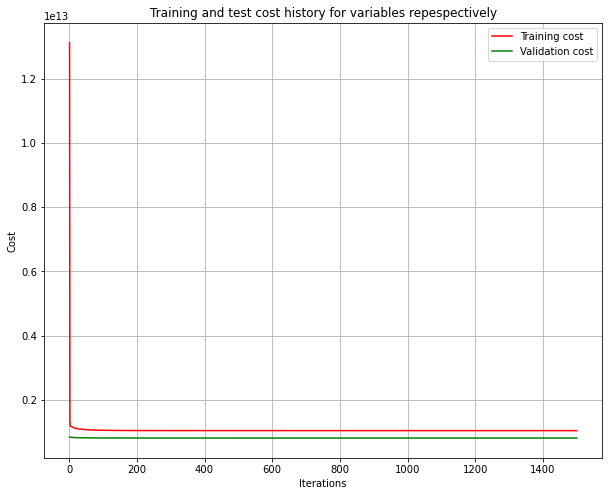

In [1475]:
# Plots training set
plt.figure(1)
plt.plot(np.linspace(1, iterations, iterations), train_cost, color='red',
         label='Training cost')
plt.plot(np.linspace(1, iterations, iterations), Validationcost, color='green',
         label='Validation cost')
plt.rcParams['figure.figsize'] = (10, 6)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and test cost history for variables repespectively')
plt.legend()

In [1476]:

m = len(df_train)
x = df_train.values[:, 2:12]
x = np.hstack((np.ones((m, 1)), x.reshape(m, 10)))

In [1477]:
#This function retrains the entire model
theta = np.zeros(11)
theta, train_cost = gradient_descent(x, y, theta, alpha, iterations)

In [1478]:
# Formats test set
m = len(df_test)
x_0 = df_test.values[:, 2:12]
x_0 = np.hstack((np.ones((m, 1)), x_0.reshape(m, 10)))

In [1479]:
# Computes test cost
Validationcost = gradient_descent(x_0, y_0, theta, alpha, iterations)[1]
print('theta =', theta)

theta = [437633.94479189994 181036.77636442526 988613.7604707936 410311.3402010583
 756461.4261511914 538943.5229735046 265720.24743397126 1180856.4100370929
 1088780.0307373086 413179.7633270081 978459.2987293216]


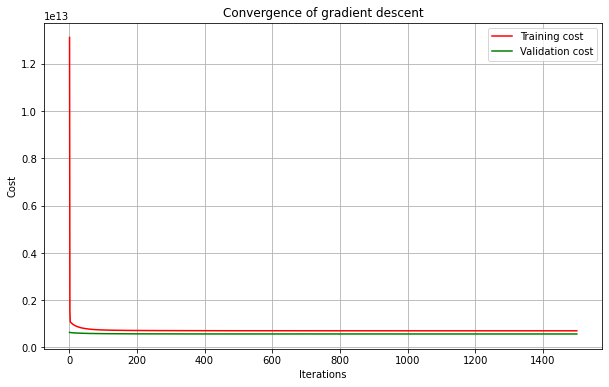

In [1480]:
# Plots training test for all variables
plt.figure(2)
plt.plot(np.linspace(1, iterations, iterations), train_cost, color='red',
         label='Training cost')
plt.plot(np.linspace(1, iterations, iterations), Validationcost, color='green',
         label='Validation cost')
plt.rcParams['figure.figsize'] = (10, 8)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence of gradient descent')
plt.legend()

In [1481]:
# This funtionDefines minimum and maximum 
scaler1 = MinMaxScaler()
df_train_norm = df_train[num_vars].values[:, :6]
df_test_norm = df_test[num_vars].values[:, :6]
df_train_norm = scaler1.fit_transform(df_train_norm)
df_test_norm = scaler1.fit_transform(df_test_norm)

In [1482]:
# Formats training set
m = len(df_train_norm)
y = df_train_norm[:, 0]
x = df_train_norm[:, 1:6]
x = np.hstack((np.ones((m, 1)), x.reshape(m, 5)))

In [1483]:
# Retrains ML model with x1, x2, x3, x4, x10
theta = np.zeros(6)
theta, train_cost = gradient_descent(x, y, theta, alpha, iterations)

In [1484]:
# Formats test set
m = len(df_test_norm)
y_0 = df_test_norm[:, 0]
x_0 = df_test_norm[:, 1:6]
x_0 = np.hstack((np.ones((m, 1)), x_0.reshape(m, 5)))

In [1485]:
# Computes test cost
Validationcost = gradient_descent(x_0, y_0, theta, alpha, iterations)[1]
print('theta =', theta)


theta = [0.04160884 0.36839377 0.09341937 0.20038078 0.13404017 0.09696011]


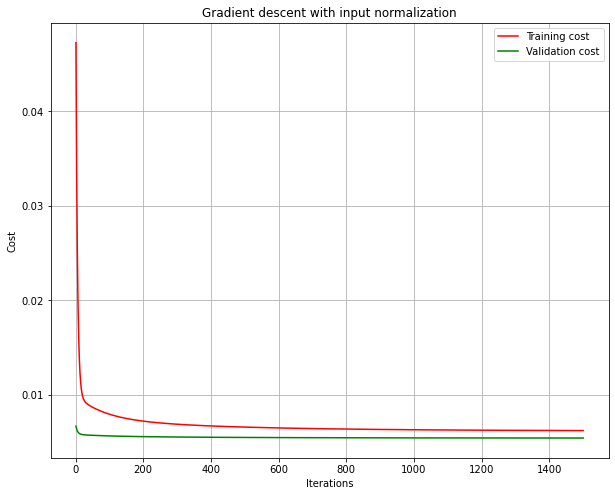

In [1486]:
# Plots training and test cost history for x1, x2, x3, x4, x10
plt.figure(3)
plt.plot(np.linspace(1, iterations, iterations), train_cost, color='red',
         label='Training cost')
plt.plot(np.linspace(1, iterations, iterations), Validationcost, color='green',
         label='Validation cost')
plt.rcParams['figure.figsize'] = (10, 8)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient descent with input normalization')
plt.legend()

In [1487]:
# Defines standardization scaler
scaler2 = StandardScaler()
df_train_stand = df_train[num_vars].values[:, :6]
df_test_stand = df_test[num_vars].values[:, :6]
df_train_stand = scaler2.fit_transform(df_train_stand)
df_test_stand = scaler2.fit_transform(df_test_stand)

In [1488]:
# Formats training set
m = len(df_train_stand)
y = df_train_stand[:, 0]
x = df_train_stand[:, 1:6]
x = np.hstack((np.ones((m, 1)), x.reshape(m, 5)))

In [1489]:
# Retrains ML model with x1, x2, x3, x4, x10
theta = np.zeros(6)
theta, train_cost = gradient_descent(x, y, theta, alpha, iterations)

In [1490]:
# Formats test set
m = len(df_test_stand)
y_0 = df_test_stand[:, 0]
x_0 = df_test_stand[:, 1:6]
x_0 = np.hstack((np.ones((m, 1)), x_0.reshape(m, 5)))


In [1491]:
# Computes test cost
Validationcost = gradient_descent(x_0, y_0, theta, alpha, iterations)[1]
print(' theta =', theta)

 theta = [1.79561819e-16 3.83653304e-01 1.04343457e-01 2.98541735e-01
 2.34542828e-01 1.49757135e-01]


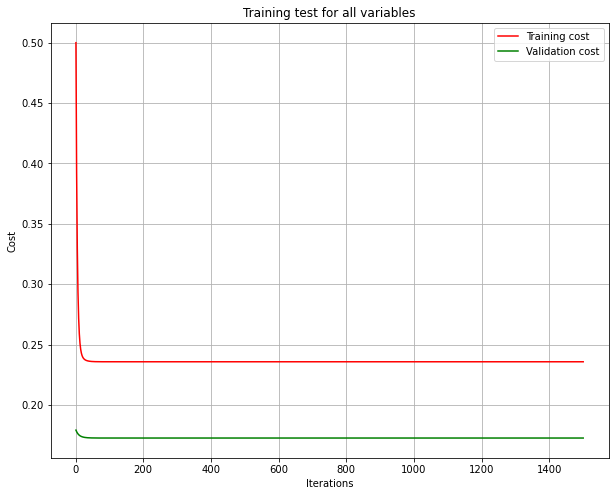

In [1492]:
# Plots training and test cost history for x1, x2, x3, x4, x10
plt.figure(4)
plt.plot(np.linspace(1, iterations, iterations), train_cost, color='red',
         label='Training cost')
plt.plot(np.linspace(1, iterations, iterations), Validationcost, color='green',
         label='Validation cost')
plt.rcParams['figure.figsize'] = (10, 8)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training test for all variables')
plt.legend()


In [1493]:

# Defines maximum and minimum scalar
df_train_norm = df_train.values[:, :12]
df_test_norm = df_test.values[:, :12]
df_train_norm = scaler1.fit_transform(df_train_norm)
df_test_norm = scaler1.fit_transform(df_test_norm)


In [1494]:
#Trainset format
m = len(df_train_norm)
y = df_train_norm[:, 0]
x = df_train_norm[:, 1:12]
x = np.hstack((np.ones((m, 1)), x.reshape(m, 11)))

In [1495]:
# Trains the machine learning model
theta = np.zeros(12)
theta, train_cost = gradient_descent(x, y, theta, alpha, iterations)


In [1496]:
# Formats test set
m = len(df_test_norm)
y_0 = df_test_norm[:, 0]
x_0 = df_test_norm[:, 1:12]
x_0 = np.hstack((np.ones((m, 1)), x_0.reshape(m, 11)))

In [1497]:
# Computes test cost
Validationcost = gradient_descent(x_0, y_0, theta, alpha, iterations)[1]
print('Final value of theta =', theta)


Final value of theta = [-0.00030068  0.24463399  0.0558249   0.166414    0.10983887  0.04724366
  0.03795568  0.02992177  0.10666471  0.08271132  0.07520951  0.06660711]


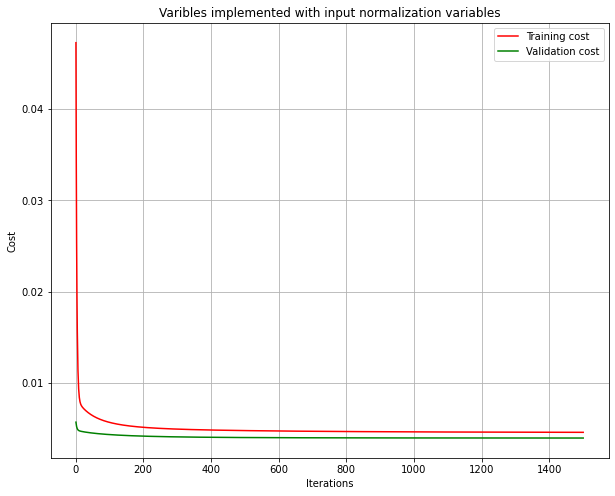

In [1498]:

plt.figure(5)
plt.plot(np.linspace(1, iterations, iterations), train_cost, color='red',
         label='Training cost')
plt.plot(np.linspace(1, iterations, iterations), Validationcost, color='green',
         label='Validation cost')
plt.rcParams['figure.figsize'] = (10, 8)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Varibles implemented with input normalization'
          ' variables')
plt.legend()

In [1499]:
# Defines standardization scaler
df_train_stand = df_train.values[:, :12]
df_test_stand = df_test.values[:, :12]
df_train_stand = scaler2.fit_transform(df_train_stand)
df_test_stand = scaler2.fit_transform(df_test_stand)

In [1500]:
# Formats training set
m = len(df_train_stand)
y = df_train_stand[:, 0]
x = df_train_stand[:, 1:12]
x = np.hstack((np.ones((m, 1)), x.reshape(m, 11)))

In [1501]:

theta = np.zeros(12)
theta, train_cost = gradient_descent(x, y, theta, alpha, iterations)


In [1502]:
# Formats test set
m = len(df_test_stand)
y_0 = df_test_stand[:, 0]
x_0 = df_test_stand[:, 1:12]
x_0 = np.hstack((np.ones((m, 1)), x_0.reshape(m, 11)))


In [1503]:

Validationcost = gradient_descent(x_0, y_0, theta, alpha, iterations)[1]
print('theta =', theta)


theta = [1.52738714e-16 2.69430270e-01 5.88474875e-02 2.48153203e-01
 1.99265962e-01 9.20205597e-02 8.25960172e-02 9.41683856e-02
 1.40206929e-01 2.32616682e-01 1.16157210e-01 1.62960286e-01]


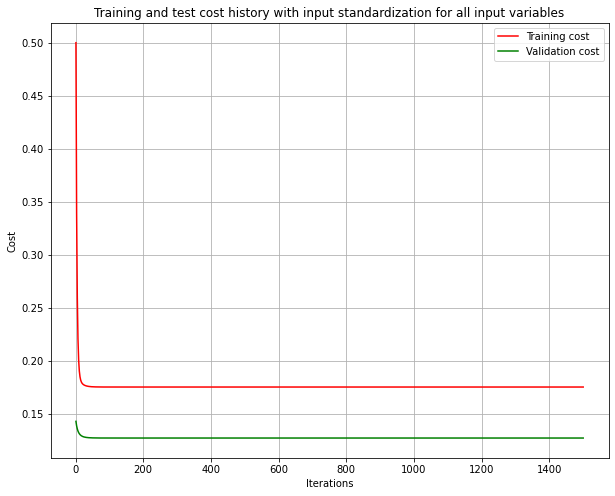

In [1504]:

plt.figure(6)
plt.plot(np.linspace(1, iterations, iterations), train_cost, color='red',
         label='Training cost')
plt.plot(np.linspace(1, iterations, iterations), Validationcost, color='green',
         label='Validation cost')
plt.rcParams['figure.figsize'] = (10, 8)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and test cost history with input standardization for all input'
          ' variables')
plt.legend()

In [1505]:

reg_param = 0.01

In [1506]:
#Minimum and maximum scalar applied
df_train_norm = df_train[num_vars].values[:, :6]
df_test_norm = df_test[num_vars].values[:, :6]
df_train_norm = scaler1.fit_transform(df_train_norm)
df_test_norm = scaler1.fit_transform(df_test_norm)

In [1507]:
# Formats training set
m = len(df_train_norm)
y = df_train_norm[:, 0]
x = df_train_norm[:, 1:6]
x = np.hstack((np.ones((m, 1)), x.reshape(m, 5)))


In [1508]:
#Funtion is used to retrain reguraized models
theta = np.zeros(6)
theta, train_cost = gradient_descent_reg(x, y, theta, alpha, iterations, reg_param)

In [1509]:
# Formats test set
m = len(df_test_norm)
y_0 = df_test_norm[:, 0]
x_0 = df_test_norm[:, 1:6]
x_0 = np.hstack((np.ones((m, 1)), x_0.reshape(m, 5)))


In [1510]:

Validationcost = gradient_descent(x_0, y_0, theta, alpha, iterations)[1]
print(' theta =', theta)

 theta = [0.04168137 0.36808029 0.0934267  0.20031399 0.13403137 0.09699192]


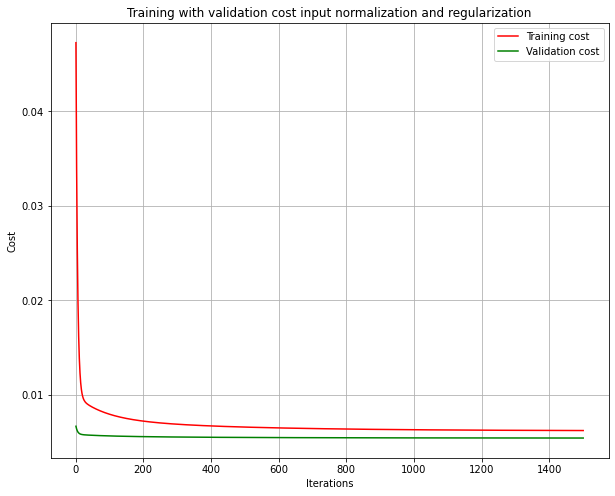

In [1511]:

plt.figure(7)
plt.plot(np.linspace(1, iterations, iterations), train_cost, color='red',
         label='Training cost')
plt.plot(np.linspace(1, iterations, iterations), Validationcost, color='green',
         label='Validation cost')
plt.rcParams['figure.figsize'] = (10, 6)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training with validation cost input normalization and regularization')
plt.legend()

In [1385]:

#Functtion utilizes the minimum and maximum scalar
df_train_norm = df_train.values[:, :12]
df_test_norm = df_test.values[:, :12]
df_train_norm = scaler1.fit_transform(df_train_norm)
df_test_norm = scaler1.fit_transform(df_test_norm)

In [1386]:
#Test set data format 
m = len(df_train_norm)
y = df_train_norm[:, 0]
x = df_train_norm[:, 1:12]
x = np.hstack((np.ones((m, 1)), x.reshape(m, 11)))

In [1387]:
#Retrains all variables
theta = np.zeros(12)
theta, train_cost = gradient_descent_reg(x, y, theta, alpha, iterations, reg_param)


In [1388]:
#Test set data format
m = len(df_test_norm)
y_0 = df_test_norm[:, 0]
x_0 = df_test_norm[:, 1:12]
x_0 = np.hstack((np.ones((m, 1)), x_0.reshape(m, 11)))

In [1389]:
# Computes test cost
Validationcost = gradient_descent(x_0, y_0, theta, alpha, iterations)[1]
print('theta =', theta)

theta = [-0.00025713  0.24441419  0.05583525  0.166358    0.10982188  0.04725399
  0.03796283  0.02991754  0.1066072   0.08271691  0.07522892  0.06661762]


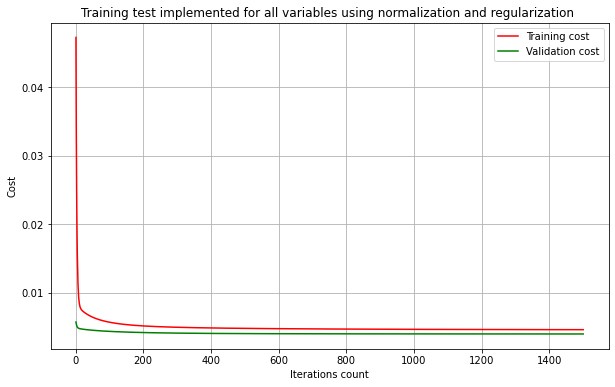

In [1390]:

plt.figure(8)
plt.plot(np.linspace(1, iterations, iterations), train_cost, color='red',
         label='Training cost')
plt.plot(np.linspace(1, iterations, iterations), Validationcost, color='green',
         label='Validation cost')
plt.rcParams['figure.figsize'] = (10, 6)
plt.grid()
plt.xlabel('Iterations count')
plt.ylabel('Cost')
plt.title('Training test implemented for all variables using normalization and regularization'
          ' ')
plt.legend()
plt.show()